<h1> Model Evaluation Notebook </h1>

<p> Comparing the performance of the two different models </p>

In [13]:
# Loading libraries
import numpy as np
import json
import pandas as pd
from ast import literal_eval
import librosa
import keras
import os
import glob

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [14]:
# please set this variable to where you cloned the git repo "final-project-code-nathanheck255"

filepath = "/blue/eel6825/nathan.heck/FinalProject/final-project-code-nathanheck255"
os.chdir(filepath)

<h1> Model 1 Testing </h1>

In [15]:
# Loading the pretrained model 1
from keras.models import load_model

model=load_model('model.h5')

In [16]:
# Loading the test data
test_data_path = 'mfcc_test_data.json'
with open(test_data_path, "r") as fp2:
        test_data = json.load(fp2)
X_test = np.array(test_data["mfcc"])
y_test = np.array(test_data["label"])

print(y_test.shape[0])

61


In [17]:
# Predict class labels for each test audio file. There might be some warnings here but no errors
yhat = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


<h1> Model 1 Results </h1>

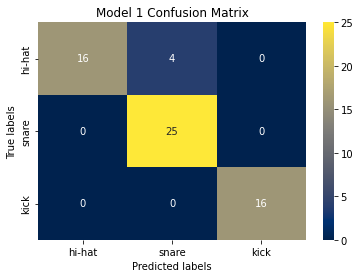

In [18]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,yhat.argmax(axis=1))

import seaborn as sns    

ax= plt.subplot()
sns.heatmap(cm1, annot=True, fmt='g', ax=ax, cmap = 'cividis');  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Model 1 Confusion Matrix'); 
ax.xaxis.set_ticklabels(['hi-hat', 'snare', 'kick']); ax.yaxis.set_ticklabels(['hi-hat', 'snare', 'kick']);

<h1> Model 2 Testing </h1>

In [19]:
# calculate spectrograms for all the test audio files

os.chdir("TestData")
folder_names = glob.glob("*")
x_test = []
t_test = []
i=0
for instrument in folder_names:
    os.chdir(instrument)
    file_names = glob.glob("*.wav")
    for wav in file_names:
        waveform, samplerate = librosa.load(wav, sr=22050, mono=True)
        waveform = librosa.util.fix_length(waveform, size=32600)
        spec = librosa.feature.melspectrogram(y=waveform, sr=samplerate, n_fft = 512, hop_length = 256)
        normalized_spec = librosa.util.normalize(spec)
        x_test.append(normalized_spec)
        t_test.append(i)
    os.chdir("..")
    i=i+1
    
x_test = np.array(x_test)
x_test = x_test[..., np.newaxis]

os.chdir(filepath)

In [20]:
# load the pretrained models and perform feature extraction on the test audio files
encoder=load_model('encoder.h5')
model2 = load_model('model2.h5')
test_latents = encoder.predict(x_test)
print(test_latents.shape)

# Predict class labels for each test audio file. There might be some warnings here but no errors
yhat = model2.predict(test_latents)

2/2 [==============================] - 0s 58ms/step
(61, 16, 16, 8)
2/2 [==============================] - 0s 4ms/step


<h1> Model 2 Results </h1>

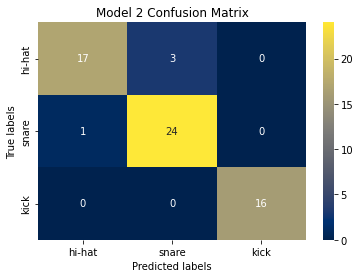

In [21]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(t_test,yhat.argmax(axis=1))

import seaborn as sns    

ax= plt.subplot()
sns.heatmap(cm2, annot=True, fmt='g', ax=ax, cmap = 'cividis');  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Model 2 Confusion Matrix'); 
ax.xaxis.set_ticklabels(['hi-hat', 'snare', 'kick']); ax.yaxis.set_ticklabels(['hi-hat', 'snare', 'kick']);
